## First we need to import all the labreries we'll use.

In [42]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pycaret.classification import setup, compare_models, tune_model, predict_model

In [43]:
# Charger le fichier (remplacez le chemin par celui de votre fichier)
uploaded = files.upload()

# Charger le fichier CSV dans un DataFrame
data2 = pd.read_csv('stroke_prediction.csv')

# Afficher les 5 premières lignes
data2.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [44]:
raw_data = data2.copy()

In [45]:
data2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [46]:
print(data2.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [47]:
data2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
# traitement des ligne dupliquer
duplicate=data2.duplicated()
nbr_duplicate=duplicate.sum()
print (f"number of duplicate rows is:{nbr_duplicate}")


number of duplicate rows is:0


In [49]:
data2=data2.drop('id',axis=1)
data2.columns
data2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
# verifier les types des données
print(data2.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [51]:
data2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### BMI analysis

In [52]:
# Number of BMI - NULL values
data2['bmi'].isnull().sum()

201

In [53]:
df_na=data2.loc[data2['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=data2['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [54]:
# Analysing whether to drop NA values in Bmi column
df_na=data2.loc[data2['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",data2['stroke'].sum())


Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


* Among the 201 bmi NULL values 40 values in them got stroke
* Thus we cant drop NULL values

In [55]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",data2['bmi'].median())
data2['bmi']=data2['bmi'].fillna(data2['bmi'].median())

median of bmi 28.1


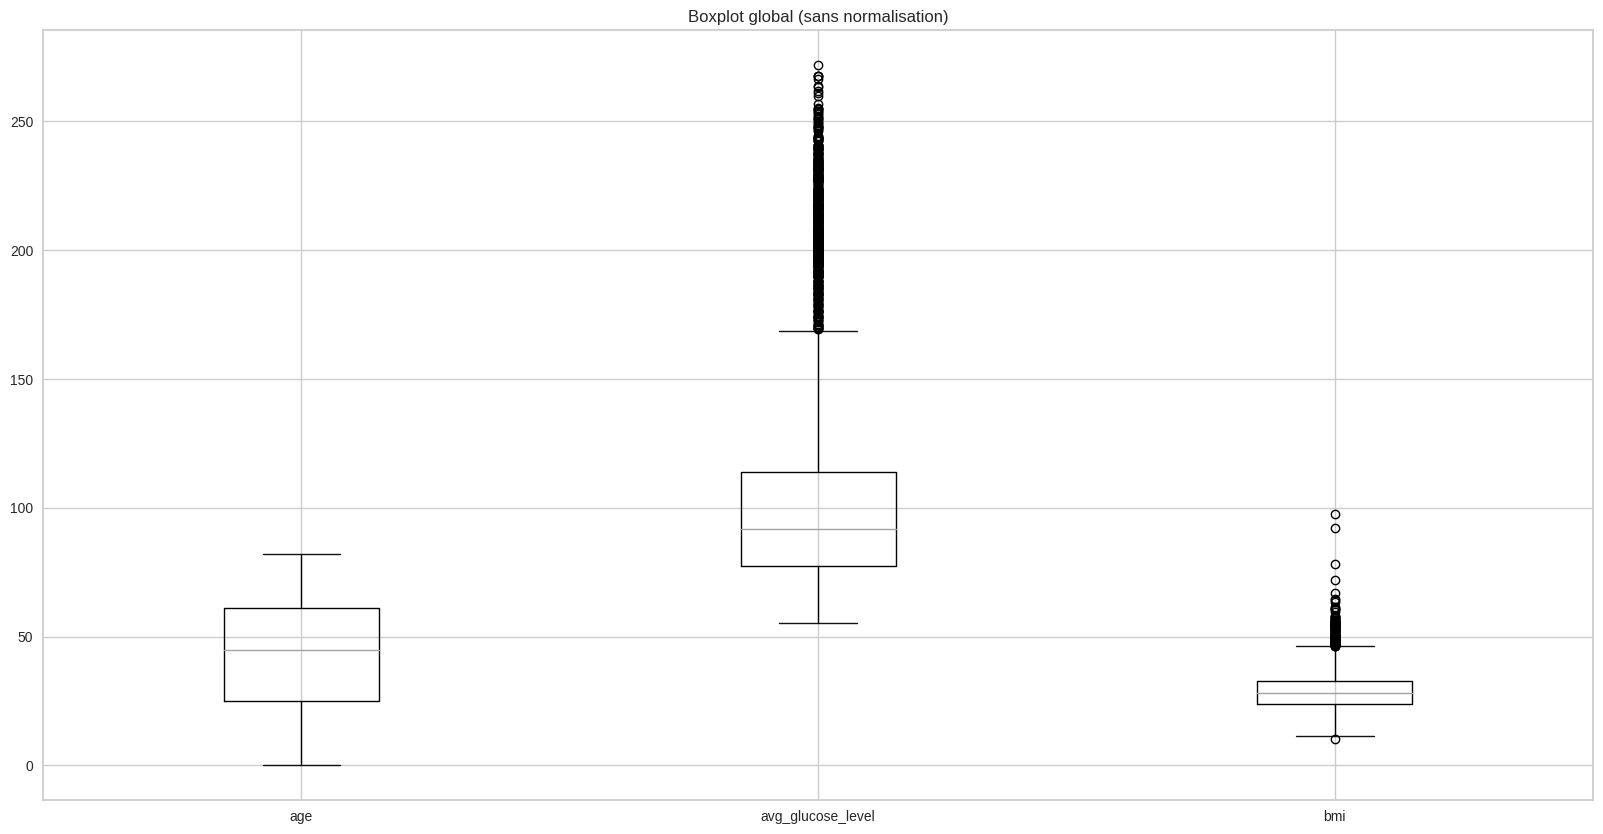

[1 0]


In [56]:
#visualisation des outliers

# Charger les données (assurez-vous de charger votre fichier CSV si nécessaire)
# data2 = pd.read_csv('path_to_your_data.csv')  # Remplacez par le chemin vers votre fichier

# Sélectionner uniquement les colonnes numériques
data_numeric = data2[['age', 'avg_glucose_level', 'bmi']]

# Tracer un boxplot global pour les colonnes numériques
plt.figure(figsize=(20, 10))
data_numeric.boxplot()
plt.title("Boxplot global (sans normalisation)")
plt.show()

print(data2['stroke'].unique())

Distribution initiale de 'stroke' :
stroke
0    4861
1     249
Name: count, dtype: int64
Distribution après suppression des outliers de 'stroke' :
stroke
0    4043
1     156
Name: count, dtype: int64


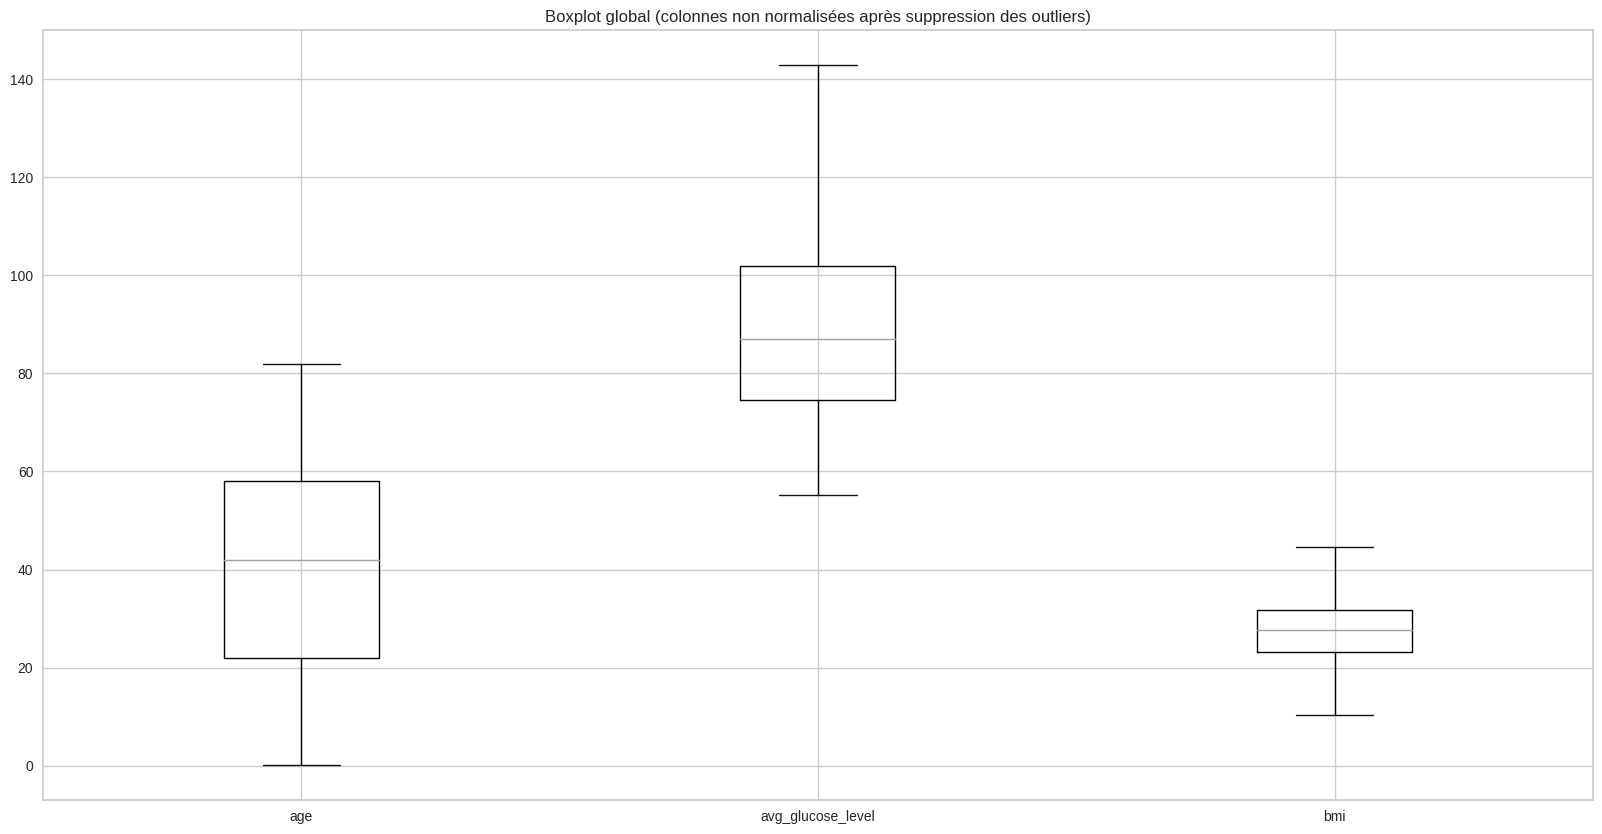

Valeurs uniques après nettoyage de 'stroke' : [1 0]


In [57]:
# Afficher la distribution de 'stroke' avant le nettoyage
print(f"Distribution initiale de 'stroke' :\n{data2['stroke'].value_counts()}")

# Assurez-vous de partir de vos données originales
data2_original = data2.copy()

# Étape 1 : Supprimer les outliers pour chaque colonne numérique
data_numeric = data2[['age', 'avg_glucose_level', 'bmi']]

# Fonction pour supprimer les outliers, mais sans affecter la colonne 'stroke'
def remove_outliers(df, column):
    while True:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr

        initial_shape = df.shape[0]
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

        if df.shape[0] == initial_shape:  # Sortir si aucune suppression supplémentaire
            break
    return df

# Appliquer la suppression des outliers pour chaque colonne numérique
for column in data_numeric.columns:
    # Ne pas supprimer les outliers sur la colonne 'stroke'
    if column != 'stroke':
        data2_original = remove_outliers(data2_original, column)

# Afficher la distribution de 'stroke' après la suppression des outliers
print(f"Distribution après suppression des outliers de 'stroke' :\n{data2_original['stroke'].value_counts()}")

# Étape 2 : Vérification des outliers restants avec un boxplot
plt.figure(figsize=(20, 10))
data2_original[['age', 'avg_glucose_level', 'bmi']].boxplot()
plt.title("Boxplot global (colonnes non normalisées après suppression des outliers)")
plt.show()

# Réintégrer les données nettoyées dans data2
data2 = data2_original.copy()

# Afficher les valeurs uniques de 'stroke' après nettoyage
print(f"Valeurs uniques après nettoyage de 'stroke' : {data2['stroke'].unique()}")


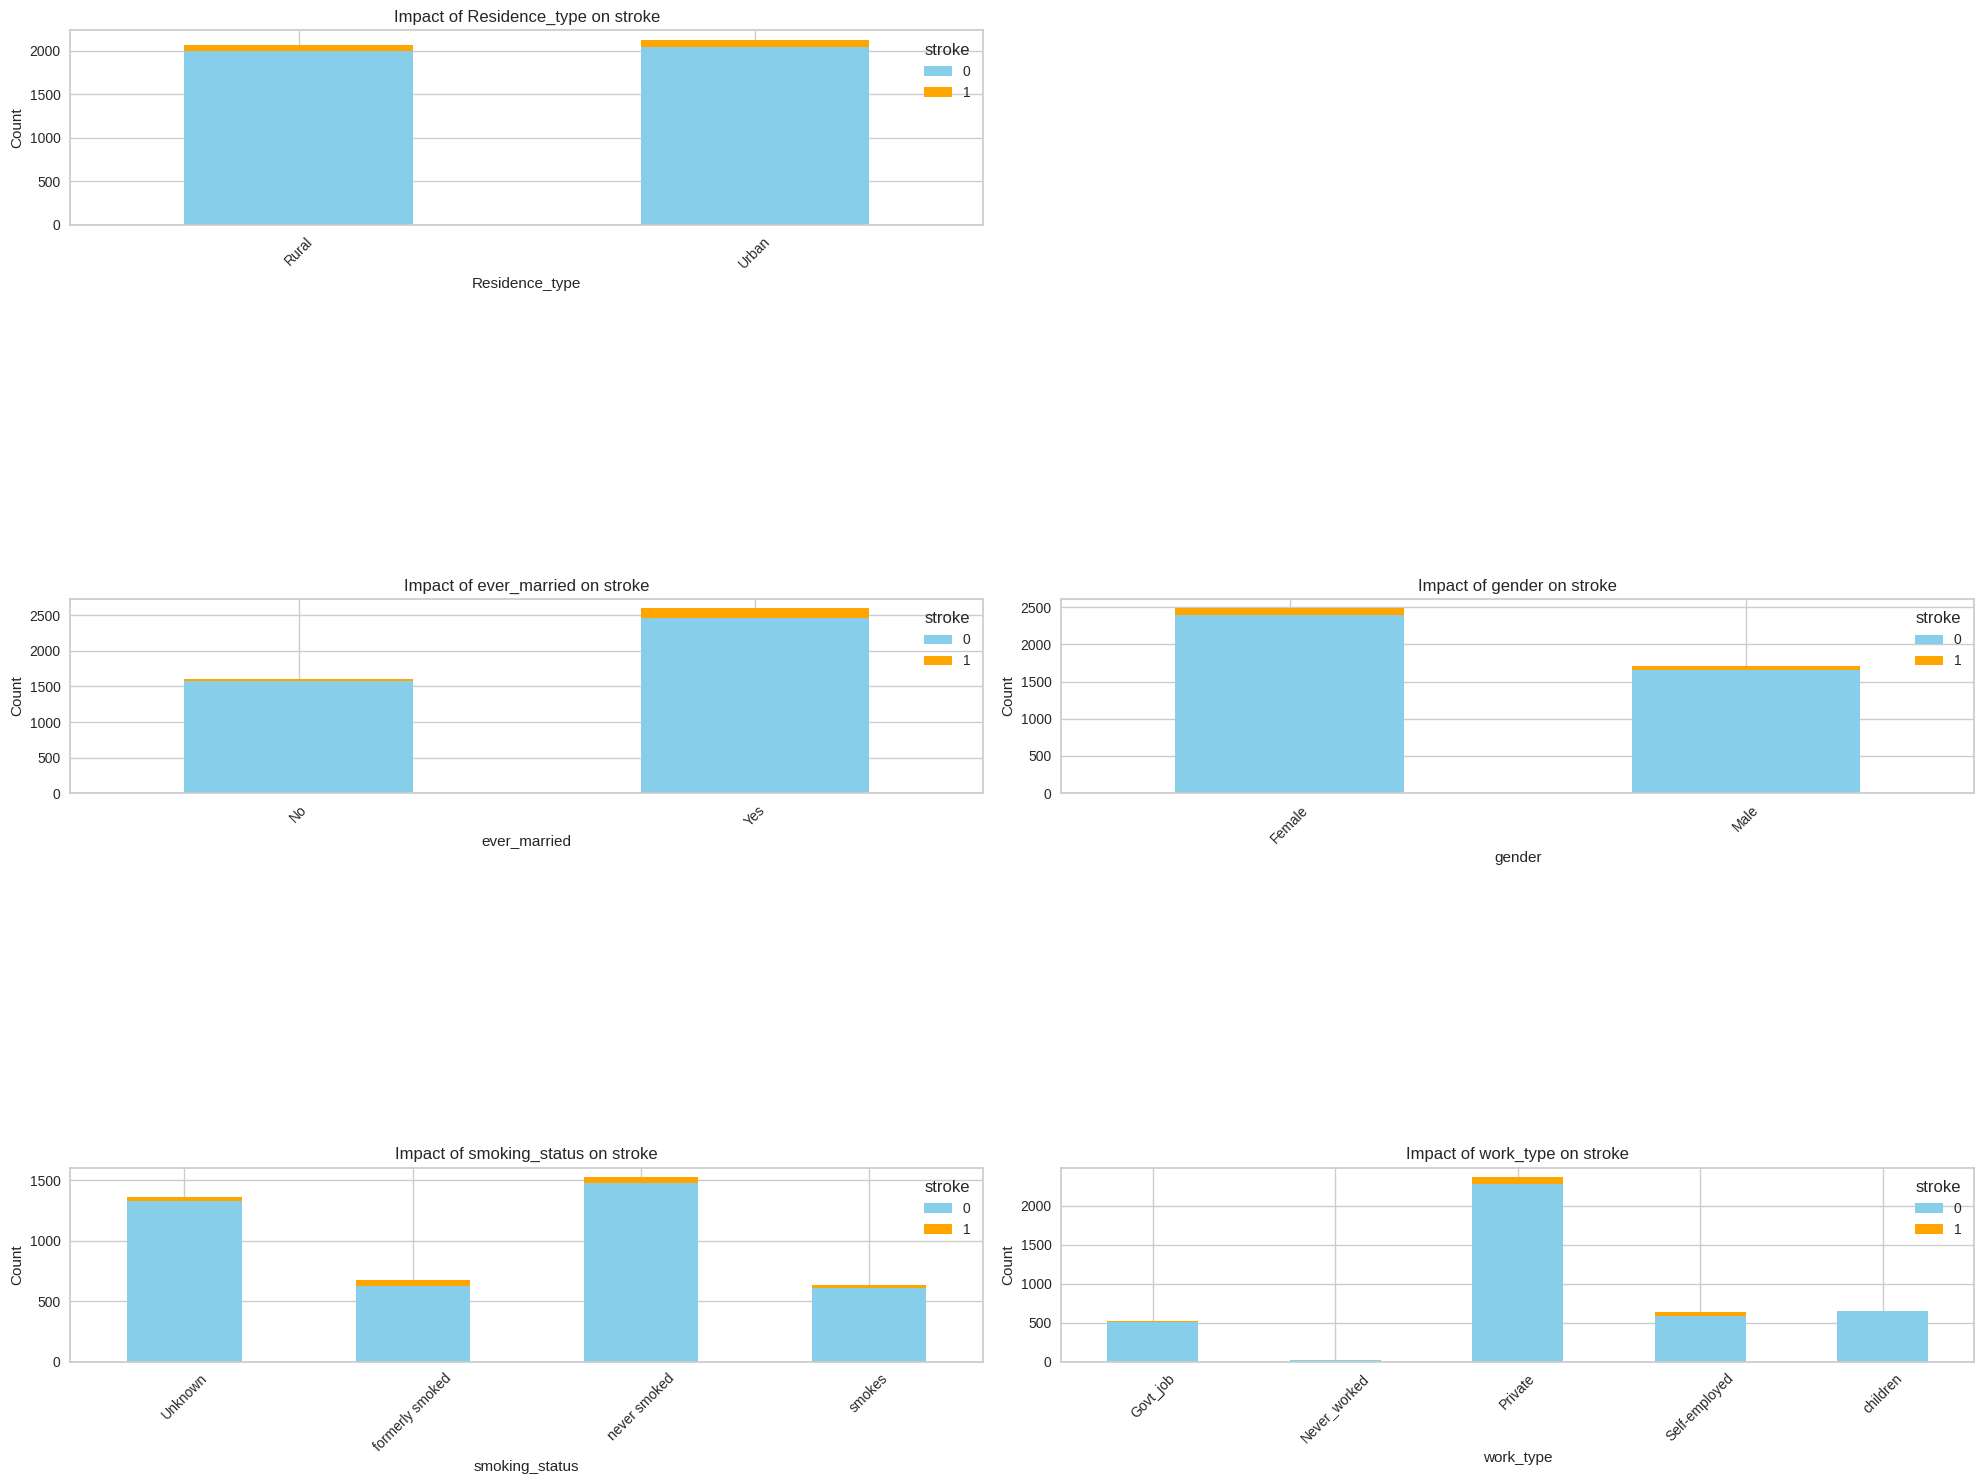

In [58]:
#pesentation des catégories

# Définir la colonne cible
target = 'stroke'

# Liste des colonnes à analyser (seulement les colonnes catégoriques)
columns = data2.columns.difference([target])

# Visualisation pour les colonnes catégoriques
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns, 1):
    if data2[col].dtype == 'object':  # Si la colonne est catégorique
        plt.subplot((len(columns) + 1) // 2, 2, i)

        # Agréger les données par la colonne et la cible (stroke)
        grouped = data2.groupby([col, target]).size().unstack(fill_value=0)

        # Tracer un diagramme en barres empilées
        grouped.plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'orange'])
        plt.title(f"Impact of {col} on {target}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


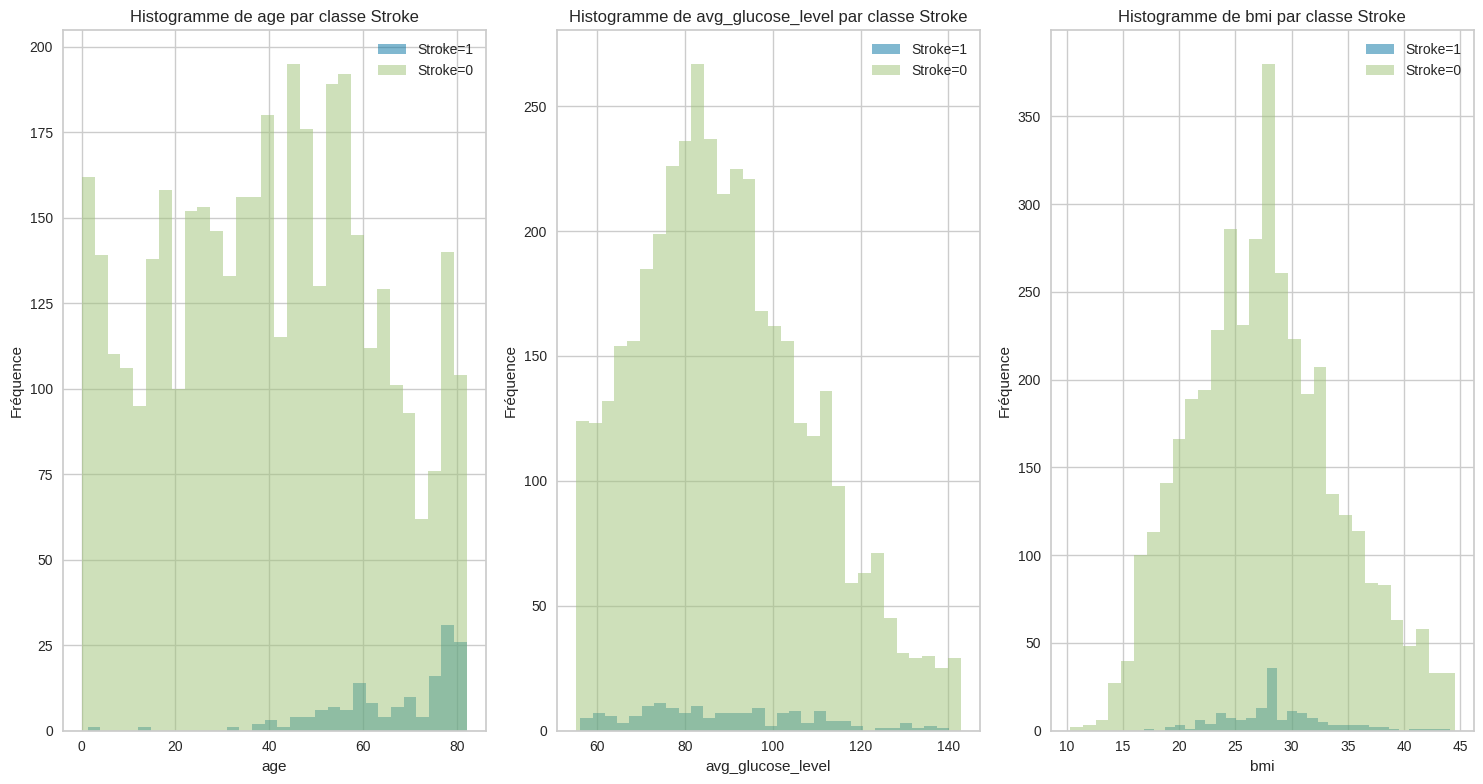

In [59]:
#Le code que vous avez utilisé génère des histogrammes pour chaque variable numérique (ici, age, avg_glucose_level, bmi) en fonction de la classe de la variable cible stroke (soit stroke=0 pour ceux sans AVC, soit stroke=1 pour ceux avec AVC).

# Liste des colonnes numériques
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Créer des histogrammes séparés pour chaque variable numérique
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    for label in data2['stroke'].unique():  # Pour chaque classe de la cible (stroke)
        subset = data2[data2['stroke'] == label]
        plt.hist(subset[col], bins=30, alpha=0.5, label=f"Stroke={label}")
    plt.title(f'Histogramme de {col} par classe Stroke')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.legend()

plt.tight_layout()
plt.show()


In [60]:

# encoding dans  data2_copy pas data2

# Créer une copie de data2 pour éviter de modifier les données d'origine
data2_copy = data2.copy()

# Étape 1: Sélectionner les colonnes catégorielles, sauf 'residence_type'
categorical_columns = data2_copy.select_dtypes(include=['object']).columns.difference(['residence_type'])

# Encodage binaire (Label Encoding) pour les colonnes avec 2 valeurs distinctes
label_encoder = LabelEncoder()

for col in categorical_columns:
    if data2_copy[col].nunique() == 2:  # Si la colonne a deux valeurs distinctes
        # Si la colonne contient déjà uniquement 0 et 1, on ne l'encode pas
        if data2_copy[col].isin([0, 1]).all():
            continue
        else:
            data2_copy[col] = label_encoder.fit_transform(data2_copy[col])

# Encodage One-Hot (pour les colonnes avec plus de 2 valeurs distinctes)
data2_copy = pd.get_dummies(data2_copy, columns=[col for col in categorical_columns if data2_copy[col].nunique() > 2])

# Affichage du résultat
data2_copy.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,1,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,True,False,False
6,1,74.0,1,1,1,0,70.09,27.4,1,False,False,True,False,False,False,True,False,False
7,0,69.0,0,0,0,1,94.39,22.8,1,False,False,True,False,False,False,True,False,False
8,0,59.0,0,0,1,0,76.15,28.1,1,True,False,False,False,False,False,True,False,False
9,0,78.0,0,0,1,1,58.57,24.2,1,True,False,False,False,False,False,True,False,False


In [61]:
# Copier les données déjà encodées pour ne pas modifier data2_copy directement
data2_copy_encoded = data2_copy.copy()

# Sélectionner uniquement les colonnes numériques (après encodage)
data_numeric = data2_copy_encoded.select_dtypes(include=['float64', 'int64'])

# Filtrer les colonnes binaires (celles qui ont seulement 2 valeurs uniques)
binary_columns = [col for col in data_numeric.columns if data_numeric[col].nunique() == 2]

# Exclure les colonnes binaires de la normalisation
columns_to_normalize = [col for col in data_numeric.columns if col not in binary_columns]

# Appliquer la normalisation uniquement aux colonnes non binaires
scaler = StandardScaler()
data2_copy_encoded[columns_to_normalize] = scaler.fit_transform(data2_copy_encoded[columns_to_normalize])

# Vérifier le résultat
data2_copy_encoded.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,1,1.735207,0,1,1,0,0.865784,0.759904,1,False,False,True,False,False,False,True,False,False
6,1,1.469511,1,1,1,0,-0.981192,-0.036755,1,False,False,True,False,False,False,True,False,False
7,0,1.248098,0,0,0,1,0.271432,-0.755309,1,False,False,True,False,False,False,True,False,False
8,0,0.805272,0,0,1,0,-0.668810,0.072591,1,True,False,False,False,False,False,True,False,False
9,0,1.646642,0,0,1,1,-1.575029,-0.536619,1,True,False,False,False,False,False,True,False,False


# Building your predictions engine.

### Convert boolean columns to integers

In [62]:
df = data2_copy_encoded

df = df.astype(float)
df.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2,1.0,1.735207,0.0,1.0,1.0,0.0,0.865784,0.759904,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1.469511,1.0,1.0,1.0,0.0,-0.981192,-0.036755,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.248098,0.0,0.0,0.0,1.0,0.271432,-0.755309,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.805272,0.0,0.0,1.0,0.0,-0.668810,0.072591,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,1.646642,0.0,0.0,1.0,1.0,-1.575029,-0.536619,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
count,4199.000000,4.199000e+03,4199.000000,4199.000000,4199.000000,4199.000000,4.199000e+03,4.199000e+03,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,0.408192,-1.556798e-16,0.073351,0.039295,0.619195,0.507264,-5.685696e-16,-1.895232e-16,0.037152,0.324601,0.160038,0.363896,0.151465,0.124792,0.004525,0.563944,0.151226,0.155513
std,0.491558,1.000119e+00,0.260742,0.194319,0.485643,0.500007,1.000119e+00,1.000119e+00,0.189156,0.468281,0.366685,0.481177,0.358544,0.330522,0.067123,0.495953,0.358312,0.362436
min,0.000000,-1.803859e+00,0.000000,0.000000,0.000000,0.000000,-1.752871e+00,-2.707903e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.331846e-01,0.000000,0.000000,0.000000,0.000000,-7.505137e-01,-7.084469e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.246756e-02,0.000000,0.000000,1.000000,1.000000,-1.064174e-01,-5.513206e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,7.609893e-01,0.000000,0.000000,1.000000,1.000000,6.629413e-01,6.349375e-01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.823772e+00,1.000000,1.000000,1.000000,1.000000,2.767917e+00,2.634393e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


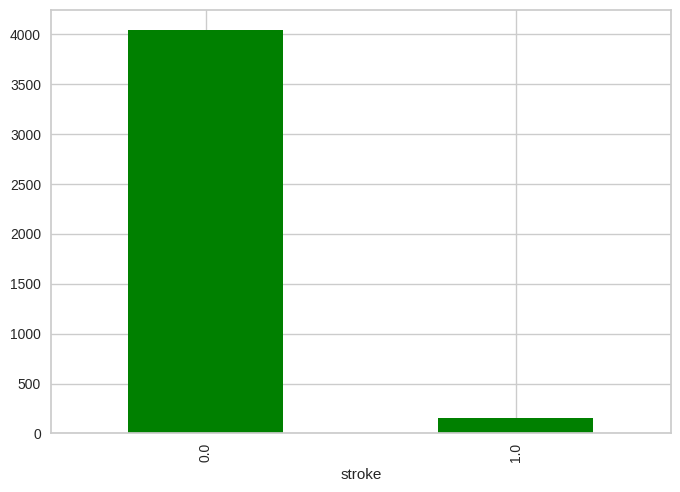

In [63]:
df['stroke'].value_counts().plot(kind="bar",color = "green")
df.describe()

### Creating test-train split (80-20 split)


In [64]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

#### Split the data into training and testing sets

In [65]:
# creating dataset split for training and testing the model

# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

#### Initialize Random Forest model

In [66]:

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))



Accuracy: 0.9944375772558715


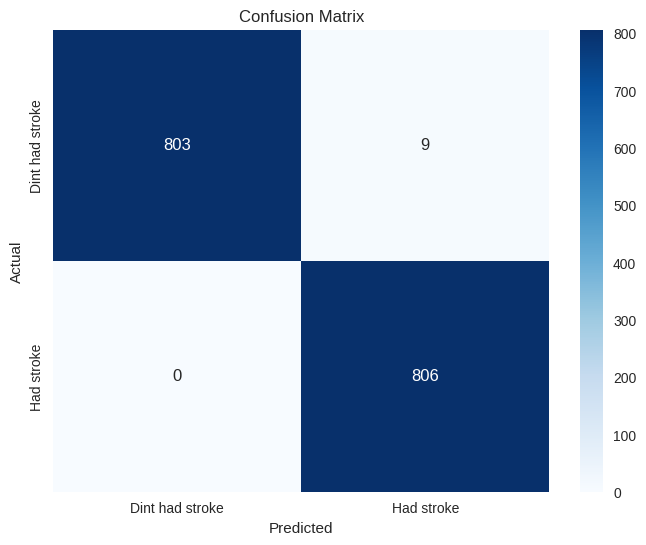

In [67]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[ 'Dint had stroke', 'Had stroke'], yticklabels=[ 'Dint had stroke','Had stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Initialize RandomizedSearchCV model

In [68]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
}

In [69]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Use a fixed random state
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Use accuracy as the evaluation metric
    verbose=1,  # Verbosity level
    n_jobs=-1  # Use all available CPU cores
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best score: 0.9924245521300643


Accuracy: 0.9950556242274413
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       812
         1.0       0.99      1.00      1.00       806

    accuracy                           1.00      1618
   macro avg       1.00      1.00      1.00      1618
weighted avg       1.00      1.00      1.00      1618



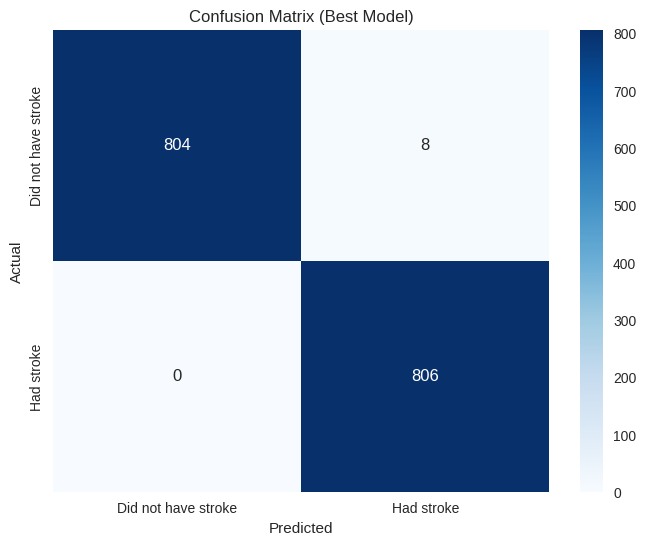

In [70]:
# Train the best model
best_rf_clf = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_rf_clf.predict(X_test)

# Evaluate the best model
print('Accuracy:', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Generate the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Did not have stroke', 'Had stroke'],
            yticklabels=['Did not have stroke', 'Had stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()



---




# PyCaret section




In [ ]:
!pip install pycaret

### Using PyCaret with imbaded data preprocessing

In [72]:
# Configurer l'environnement PyCaret
pycaret_setup = setup(
    data=raw_data,
    target='stroke',  # Colonne cible
    normalize=True,  # Normaliser les colonnes numériques
    fix_imbalance=True,  # Traiter le déséquilibre des classes
    session_id=42  # Répétabilité
)

# Comparer les modèles
best_models = compare_models(n_select=2)

,Description,Value
0,Session id,42
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(5110, 12)"
4,Transformed data shape,"(8339, 21)"
5,Transformed train set shape,"(6806, 21)"
6,Transformed test set shape,"(1533, 21)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,3.9%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9514,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1540
gbc,Gradient Boosting Classifier,0.9491,0.8149,0.0288,0.2167,0.0505,0.0421,0.0658,2.0650
rf,Random Forest Classifier,0.9463,0.8007,0.0118,0.1333,0.0211,0.0104,0.0219,1.7600
xgboost,Extreme Gradient Boosting,0.9460,0.7962,0.1049,0.3342,0.1559,0.1363,0.1620,0.7720
lightgbm,Light Gradient Boosting Machine,0.9449,0.8115,0.0526,0.1952,0.0814,0.0647,0.0793,1.6210
et,Extra Trees Classifier,0.9433,0.7689,0.0408,0.1483,0.0628,0.0449,0.0547,0.6190
ada,Ada Boost Classifier,0.9424,0.8140,0.0696,0.2131,0.1025,0.0814,0.0958,0.6520
dt,Decision Tree Classifier,0.9021,0.5373,0.1330,0.1012,0.1134,0.0630,0.0643,0.5030
knn,K Neighbors Classifier,0.8572,0.6514,0.3297,0.1263,0.1821,0.1205,0.1377,0.3990
lr,Logistic Regression,0.7543,0.8404,0.7716,0.1379,0.2337,0.1648,0.2537,1.0420


Processing:   0%|          | 0/66 [00:00<?, ?it/s]

### Using PyCaret with our data preprocessing

In [73]:
# Configurer l'environnement PyCaret
pycaret_setup = setup(
    data=df,
    target='stroke',  # Colonne cible
    normalize=True,  # Normaliser les colonnes numériques
    fix_imbalance=True,  # Traiter le déséquilibre des classes
    session_id=42,  # Répétabilité
    preprocess=False  # Pas de prétraitement spécifique
)

# Comparer les modèles
best_models = compare_models(n_select=2)

,Description,Value
0,Session id,42
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(4199, 18)"
4,Transformed data shape,"(4199, 18)"
5,Transformed train set shape,"(2939, 18)"
6,Transformed test set shape,"(1260, 18)"
7,Numeric features,17


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9629,0.8351,0.0000,0.0000,0.0000,0.0000,0.0000,0.0470
svm,SVM - Linear Kernel,0.9629,0.7359,0.0000,0.0000,0.0000,0.0000,0.0000,0.0790
ridge,Ridge Classifier,0.9629,0.8303,0.0000,0.0000,0.0000,0.0000,0.0000,0.0710
dummy,Dummy Classifier,0.9629,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0280
knn,K Neighbors Classifier,0.9622,0.5810,0.0091,0.1000,0.0167,0.0143,0.0262,0.1340
ada,Ada Boost Classifier,0.9622,0.7778,0.0273,0.1833,0.0463,0.0422,0.0633,0.6750
rf,Random Forest Classifier,0.9616,0.7776,0.0000,0.0000,0.0000,-0.0023,-0.0032,0.5740
lda,Linear Discriminant Analysis,0.9602,0.8303,0.0636,0.3333,0.1046,0.0939,0.1299,0.0530
et,Extra Trees Classifier,0.9592,0.7352,0.0091,0.0333,0.0143,0.0071,0.0072,0.7450
gbc,Gradient Boosting Classifier,0.9588,0.8232,0.0273,0.1167,0.0440,0.0342,0.0425,0.8000


Processing:   0%|          | 0/66 [00:00<?, ?it/s]



> Here we we see that the models workred with our preproced data are more accurent

